# **Data Description**

- A sentiment analysis job about the problems of each major U.S. airline.

- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as \"late flight\" or \"rude service\").

### **Objective**
- To classify the sentiment of tweets into the positive, neutral & negative.

- Build an app using Streamlit for users to make predictions or inference using your model.

## **Importing the libraries**

In [ ]:
 !pip install contractions

In [ ]:
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters

#import unidecode

# Importing the NLTK library
import nltk

nltk.download('omw-1.4')
# # downloading vader lexicon
# nltk.download('vader_lexicon')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the dataset**

In [ ]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Assignment/airplane/Tweets.csv")

In [ ]:
# Creating the copy of the data frame
df = data.copy()

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df["tweet_id"].nunique()

14485

## **Overview of the dataset**

In [ ]:
df = df.loc[:, ["airline_sentiment", "text"]]

In [ ]:
df["airline_sentiment"].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

### **Understand the shape of the dataset**

In [ ]:
# Print shape of data
df.shape

(14640, 2)

### **Check the data types of the columns for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [ ]:
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

### **Checking for duplicate values**

In [ ]:
# checking for duplicate values
df.duplicated().sum()

188

In [ ]:
# Drop duplicates based on all columns
df.drop_duplicates(inplace=True)

# Display the DataFrame after dropping duplicates
print("\nDataFrame after dropping duplicates:")
print(df)


DataFrame after dropping duplicates:
      airline_sentiment  \
0               neutral   
1              positive   
2               neutral   
3              negative   
4              negative   
...                 ...   
14635          positive   
14636          negative   
14637           neutral   
14638          negative   
14639           neutral   

                                                                                                                                                         text  
0                                                                                                                         @VirginAmerica What @dhepburn said.  
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.  
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!

## **Exploratory Data Analysis**

**Word Cloud for cleaned Negative Reviews**

In [ ]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = df[df['airline_sentiment'] == "negative"]

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['text'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud


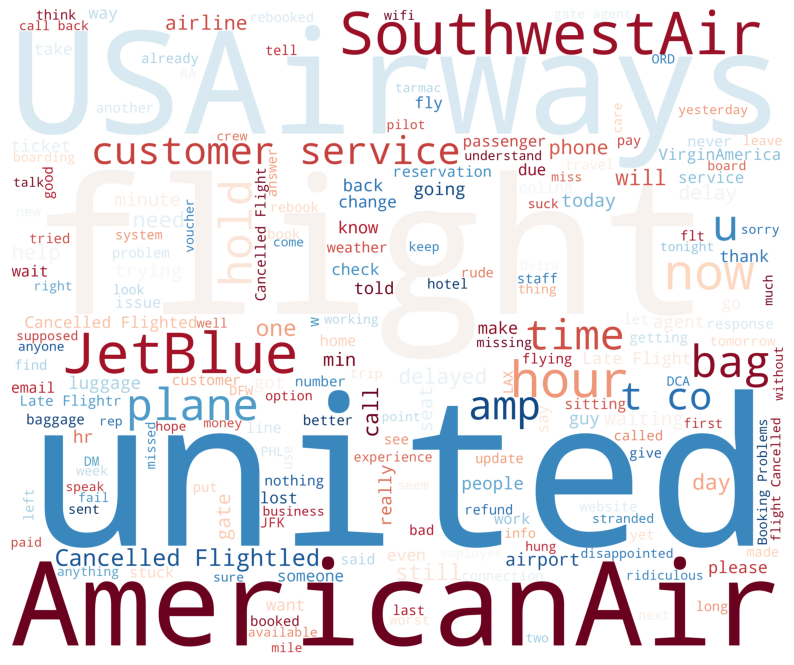

In [ ]:
plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# check the count of each labels
df['airline_sentiment'].value_counts()

negative    9087
neutral     3067
positive    2298
Name: airline_sentiment, dtype: int64

### Data Preprocessing

In [ ]:
def remove_special_chars(text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  return text

df["text"] = df["text"].apply(lambda x: remove_special_chars(x))


In [ ]:
df.head(3)

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you ve added commercials to the experience tacky
2,neutral,VirginAmerica I didn t today Must mean I need to take another trip


In [ ]:
import contractions

# Let us fix the contractions in the data

def replace_contractions(text):
  return contractions.fix(text)

df["text"] = df["text"].apply(lambda x: replace_contractions(x))

In [ ]:
df.head(3)

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you ve added commercials to the experience tacky
2,neutral,VirginAmerica I didn t today Must mean I need to take another trip


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df["text"] = df.apply(lambda row: nltk.word_tokenize(row["text"]), axis = 1)

In [ ]:
df.head(3)

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, ve, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, didn, t, today, Must, mean, I, need, to, take, another, trip]"


In [ ]:
def to_lowercase(row):
  words = [word.lower() for word in row]
  return words

df["text"] = df["text"].apply(lambda x: to_lowercase(x))


In [ ]:
df.head(3)

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, ve, added, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, didn, t, today, must, mean, i, need, to, take, another, trip]"


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

def remove_stopwords(row):
  words = [word for word in row if word not in stop_words]
  return words

df["text"] = df["text"].apply(lambda x: remove_stopwords(x))

In [ ]:
df.head(3)

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, experience, tacky]"
2,neutral,"[virginamerica, today, must, mean, need, take, another, trip]"


In [ ]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

lm = WordNetLemmatizer()

ps = PorterStemmer()

def lemmatize_words(row):
  words = [lm.lemmatize(word) for word in row]
  #words = [ps.stem(word) for word in row]   # for stemming
  return words

df["text"] = df["text"].apply(lambda x: lemmatize_words(x))

In [ ]:
df.head(3)

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercial, experience, tacky]"
2,neutral,"[virginamerica, today, must, mean, need, take, another, trip]"


### Putting All together

In [ ]:
def join_words(row):
  words = " ".join([word for word in row])
  return words

df["text"] = df["text"].apply(lambda x: join_words(x))

In [ ]:
df.head(3)

,airline_sentiment,text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercial experience tacky
2,neutral,virginamerica today must mean need take another trip


In [ ]:
df.to_csv("/content/drive/MyDrive/Assignment/airplane/cleaned_df.csv", index = False)

In [ ]:
# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Used to create the Sequential model
from tensorflow.keras.models import Sequential
#import tensorflow as tf
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### **Tokenizing and converting the reviews into numerical vectors**

In [ ]:
# Creating the tokenizer with 1000 vocab size
tokenizer = Tokenizer(num_words = 1000, split = ' ')

tokenizer.fit_on_texts(df['text'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(df['text'].values)

# Padding the sequences
X = pad_sequences(X, 100)

In [ ]:
import pickle

with open("/content/drive/MyDrive/Assignment/Models/tokenizer.pkl", "wb") as handle:
  pickle.dump(tokenizer, handle)

**Model Building**

In [ ]:
model = Sequential()

# model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e. word index) in the input
# should be no larger than vocabulary size. Now model.output_shape is (None, input_length, 256), where `None` is the batch dimension.
# input_length is X_data[1] = 700 here.
model.add(Embedding(1000, 120, input_length = 100))

model.add(SpatialDropout1D(0.2))

 # return_sequences = True means each LSTM cell in it is outputting its value.The output of the layer is a sequence of outputs.
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(3, activation = 'softmax'))

# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 120)          120000    
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 120)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 150)               162600    
                                                                 
 dense (Dense)               (None, 3)                 453       
                                                                 
Total params: 283053 (1.08 MB)
Trainable params: 283053 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Splitting the Data**

In [ ]:
# creating the target feature
y = df["airline_sentiment"]

# Define a dictionary to map class labels to integers
class_to_int = {"negative": 0, "neutral": 1, "positive": 2}

In [ ]:
# Map the class labels to integers
y_mapped = y.map(class_to_int)

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size = 0.1, random_state = 42)

In [ ]:
y_train

247      2
10041    1
8683     0
7928     0
10153    0
        ..
5211     0
13599    2
5410     1
862      0
7296     0
Name: airline_sentiment, Length: 13006, dtype: int64

**Training the model**

In [ ]:
model_path ="/content/drive/MyDrive/Assignment/Models/nlp_model.h5"
es = EarlyStopping(patience=3, verbose=2, monitor = "val_loss")
chkpt = ModelCheckpoint(model_path, verbose = 2, save_best_only = True)

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()


In [ ]:
# specifying the batch size
batch_size = 32

# fitting the model on the training data with 10 epochs
his = model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, callbacks=[es, chkpt],verbose = 1,
                validation_split = 0.1)

Epoch 1/10
366/366 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.7267
Epoch 1: val_loss improved from inf to 0.57858, saving model to /content/drive/MyDrive/Assignment/Models/nlp_model.h5
366/366 [==============================] - 158s 420ms/step - loss: 0.6715 - accuracy: 0.7267 - val_loss: 0.5786 - val_accuracy: 0.7625
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


366/366 [==============================] - ETA: 0s - loss: 0.5121 - accuracy: 0.7897
Epoch 2: val_loss improved from 0.57858 to 0.56074, saving model to /content/drive/MyDrive/Assignment/Models/nlp_model.h5
366/366 [==============================] - 150s 410ms/step - loss: 0.5121 - accuracy: 0.7897 - val_loss: 0.5607 - val_accuracy: 0.7786
Epoch 3/10
366/366 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.8040
Epoch 3: val_loss improved from 0.56074 to 0.55273, saving model to /content/drive/MyDrive/Assignment/Models/nlp_model.h5
366/366 [==============================] - 150s 411ms/step - loss: 0.4789 - accuracy: 0.8040 - val_loss: 0.5527 - val_accuracy: 0.7802
Epoch 4/10
366/366 [==============================] - ETA: 0s - loss: 0.4582 - accuracy: 0.8140
Epoch 4: val_loss did not improve from 0.55273
366/366 [==============================] - 150s 409ms/step - loss: 0.4582 - accuracy: 0.8140 - val_loss: 0.5699 - val_accuracy: 0.7663
Epoch 5/10
366/366 [=======